<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/NBA_data_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
import kagglehub
path = kagglehub.dataset_download("yagizfiratt/nba-players-database")
print("Path to dataset files:", path)

100%|██████████| 200k/200k [00:00<00:00, 82.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yagizfiratt/nba-players-database/versions/1


In [4]:
import os
print(os.listdir(path))

['PlayerIndex_nba_stats.csv']


# Preprocessing

In [33]:
df = pd.read_csv(path + "/PlayerIndex_nba_stats.csv")
df.head()

,PERSON_ID,PLAYER_LAST_NAME,PLAYER_FIRST_NAME,PLAYER_SLUG,TEAM_ID,TEAM_SLUG,IS_DEFUNCT,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,...,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,ROSTER_STATUS,PTS,REB,AST,STATS_TIMEFRAME,FROM_YEAR,TO_YEAR
0,76001,Abdelnaby,Alaa,alaa-abdelnaby,1610612757,blazers,0,Portland,Trail Blazers,POR,...,1990.0,1.0,25.0,NaN,5.7,3.3,0.3,Career,1990,1994
1,76002,Abdul-Aziz,Zaid,zaid-abdul-aziz,1610612745,rockets,0,Houston,Rockets,HOU,...,1968.0,1.0,5.0,NaN,9.0,8.0,1.2,Career,1968,1977
2,76003,Abdul-Jabbar,Kareem,kareem-abdul-jabbar,1610612747,lakers,0,Los Angeles,Lakers,LAL,...,1969.0,1.0,1.0,NaN,24.6,11.2,3.6,Career,1969,1988
3,51,Abdul-Rauf,Mahmoud,mahmoud-abdul-rauf,1610612743,nuggets,0,Denver,Nuggets,DEN,...,1990.0,1.0,3.0,NaN,14.6,1.9,3.5,Career,1990,2000
4,1505,Abdul-Wahad,Tariq,tariq-abdul-wahad,1610612758,kings,0,Sacramento,Kings,SAC,...,1997.0,1.0,11.0,NaN,7.8,3.3,1.1,Career,1997,2003


In [6]:
df.columns

Index(['PERSON_ID', 'PLAYER_LAST_NAME', 'PLAYER_FIRST_NAME', 'PLAYER_SLUG',
       'TEAM_ID', 'TEAM_SLUG', 'IS_DEFUNCT', 'TEAM_CITY', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'JERSEY_NUMBER', 'POSITION', 'HEIGHT', 'WEIGHT',
       'COLLEGE', 'COUNTRY', 'DRAFT_YEAR', 'DRAFT_ROUND', 'DRAFT_NUMBER',
       'ROSTER_STATUS', 'PTS', 'REB', 'AST', 'STATS_TIMEFRAME', 'FROM_YEAR',
       'TO_YEAR'],
      dtype='object')

In [36]:
data_df = df.loc[:,['PTS', 'REB', 'AST','FROM_YEAR','TO_YEAR']]
data_df.head()

,PTS,REB,AST,FROM_YEAR,TO_YEAR
0,5.7,3.3,0.3,1990,1994
1,9.0,8.0,1.2,1968,1977
2,24.6,11.2,3.6,1969,1988
3,14.6,1.9,3.5,1990,2000
4,7.8,3.3,1.1,1997,2003


In [38]:
data_df['career_length'] = data_df['TO_YEAR'] - data_df['FROM_YEAR']
data_df.head()

,PTS,REB,AST,FROM_YEAR,TO_YEAR,career_length
0,5.7,3.3,0.3,1990,1994,4
1,9.0,8.0,1.2,1968,1977,9
2,24.6,11.2,3.6,1969,1988,19
3,14.6,1.9,3.5,1990,2000,10
4,7.8,3.3,1.1,1997,2003,6


In [39]:
data_df.shape

(5025, 6)

In [40]:
data_df = data_df.drop(columns=['FROM_YEAR','TO_YEAR'])
data_df.head()

,PTS,REB,AST,career_length
0,5.7,3.3,0.3,4
1,9.0,8.0,1.2,9
2,24.6,11.2,3.6,19
3,14.6,1.9,3.5,10
4,7.8,3.3,1.1,6


In [41]:
# chacking for missing values
data_df.isna().sum()

,0
PTS,24
REB,316
AST,24
career_length,0


In [42]:
df.isna().all(axis=1).sum()

np.int64(0)

In [43]:
# replacing nan with the column mean
data_df['PTS'] = data_df['PTS'].fillna(data_df['PTS'].mean())
data_df['REB'] = data_df['REB'].fillna(data_df['REB'].mean())
data_df['AST'] = data_df['AST'].fillna(data_df['AST'].mean())

In [44]:
data_df.isna().sum()

,0
PTS,0
REB,0
AST,0
career_length,0


In [45]:
X = data_df.drop(columns=['career_length'])
y = data_df['career_length']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [47]:
X_train_arr = np.array(X_train)
X_test_arr = np.array(X_test)
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

In [48]:
X_train_arr.shape

(4020, 3)

# Model 1 regression NN

In [49]:
# set seed
tf.random.set_seed(42)

# build model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,1)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# fit model
history_1 = model_1.fit(X_train_arr,y_train_arr,epochs=100,verbose=0)

In [50]:
mae = tf.keras.losses.MeanAbsoluteError()

In [51]:
model_1_pred = model_1.predict(X_test_arr)
model_1_mae = mae(y_test_arr,model_1_pred)
model_1_mae

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3.499929428100586>

Text(0.5, 1.0, 'Loss after epoch')

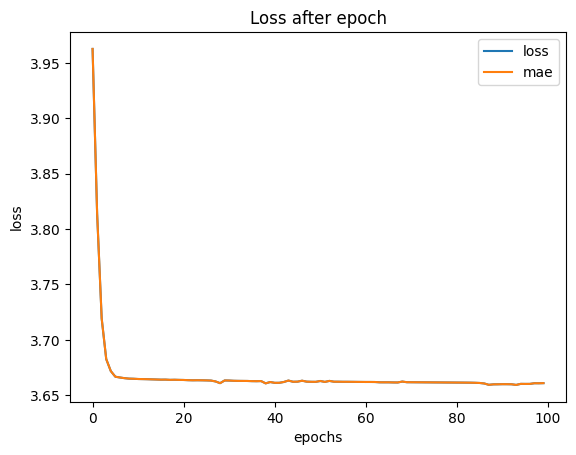

In [52]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

# model 2 regression NN

* same as model 1 in terms of structure but have increased the epochs to 500.

In [53]:
# set seed
tf.random.set_seed(42)

# build model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,1)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# fit model
history_2 = model_2.fit(X_train_arr,y_train_arr,epochs=500,verbose=0)

In [54]:
model_2_pred = model_2.predict(X_test_arr)
model_2_mae = mae(y_test_arr,model_2_pred)
model_2_mae

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3.500528335571289>

Text(0.5, 1.0, 'Loss after epoch')

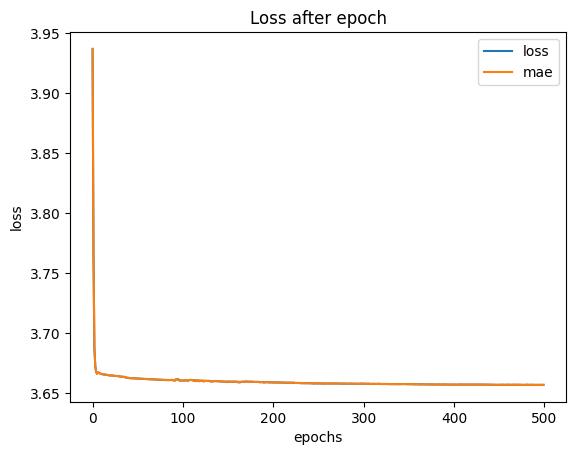

In [55]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

# model 3 regression NN

* Adding a new hidden layer with 100 neurons but with 100 epochs as increasing epochs is not making a lot of difference

In [56]:
# set seed
tf.random.set_seed(42)

# build model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,1)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# fit model
history_3 = model_3.fit(X_train_arr,y_train_arr,epochs=100,verbose=0)

In [57]:
model_3_pred = model_3.predict(X_test_arr)
model_3_mae = mae(y_test_arr,model_3_pred)
model_3_mae

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3.5003271102905273>

Text(0.5, 1.0, 'Loss after epoch')

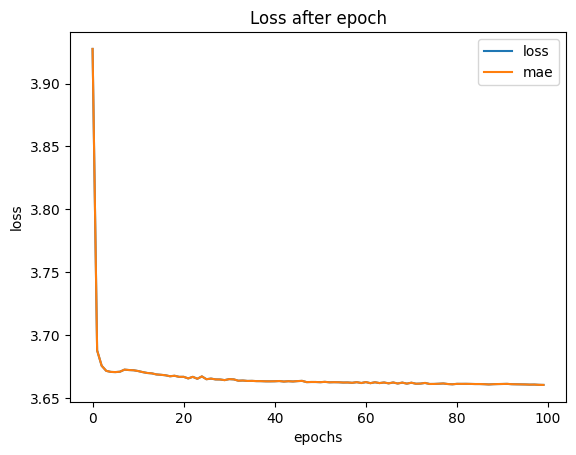

In [58]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

# model 4 regression NN

instead of the existing hidden layer with 10 neurons, I am increasing it to 100

In [59]:
# set seed
tf.random.set_seed(42)

# build model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,1)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile model
model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# fit model
history_4 = model_4.fit(X_train_arr,y_train_arr,epochs=100,verbose=0)

In [60]:
model_4_pred = model_4.predict(X_test_arr)
model_4_mae = mae(y_test_arr,model_4_pred)
model_4_mae

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3.5000462532043457>

Text(0.5, 1.0, 'Loss after epoch')

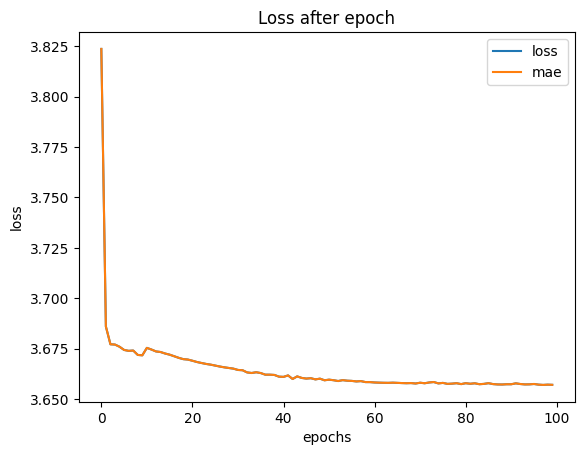

In [61]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

# model 5 regression NN

Making the first hidden layer have 1000 neurons

In [62]:
# set seed
tf.random.set_seed(42)

# build model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,1)),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile model
model_5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# fit model
history_5 = model_5.fit(X_train_arr,y_train_arr,epochs=100,verbose=0)

In [63]:
model_5_pred = model_5.predict(X_test_arr)
model_5_mae = mae(y_test_arr,model_5_pred)
model_5_mae

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3.499955654144287>

Text(0.5, 1.0, 'Loss after epoch')

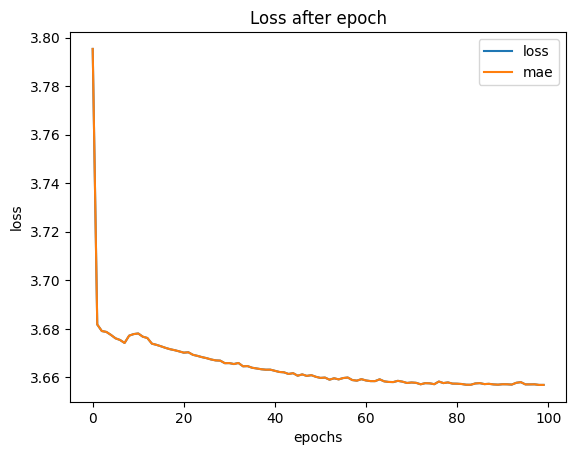

In [64]:
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

# model 6 regression NN

making all the hidden layers have a 1000 nuerons

In [65]:
# set seed
tf.random.set_seed(42)

# build model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,1)),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile model
model_6.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# fit model
history_6 = model_6.fit(X_train_arr,y_train_arr,epochs=100,verbose=0)

In [66]:
model_6_pred = model_6.predict(X_test_arr)
model_6_mae = mae(y_test_arr,model_6_pred)
model_6_mae

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=3.499459981918335>

Text(0.5, 1.0, 'Loss after epoch')

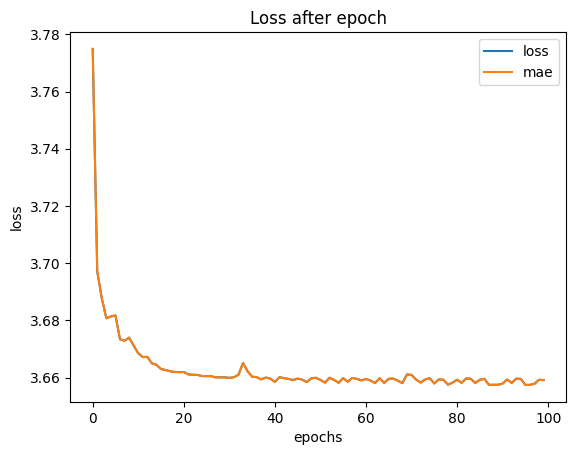

In [67]:
pd.DataFrame(history_6.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")

# model 7 regression NN

Implementing model 1 but after normalization

In [68]:
data_norm = data_df
data_norm.head()

,PTS,REB,AST,career_length
0,5.7,3.3,0.3,4
1,9.0,8.0,1.2,9
2,24.6,11.2,3.6,19
3,14.6,1.9,3.5,10
4,7.8,3.3,1.1,6


In [70]:
# normalizing df with sklearn minmax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data_norm)

In [71]:
data_norm = pd.DataFrame(data_norm)
data_norm.head()

,0,1,2,3
0,0.174312,0.144105,0.025862,0.181818
1,0.275229,0.349345,0.103448,0.409091
2,0.752294,0.489083,0.310345,0.863636
3,0.446483,0.082969,0.301724,0.454545
4,0.238532,0.144105,0.094828,0.272727


In [74]:
X_norm = data_norm.drop(columns=[3])
y_norm = data_norm[3]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2,random_state=42)

In [86]:
# set seed
tf.random.set_seed(42)

# build model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,1)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile model
model_7.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# fit model
history_7 = model_7.fit(X_train,y_train,epochs=100,verbose=0)

In [87]:
model_7_pred = model_7.predict(X_test)
model_7_mae = mae(y_test,model_7_pred)
model_7_mae

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.18423792719841003>

Text(0.5, 1.0, 'Loss after epoch')

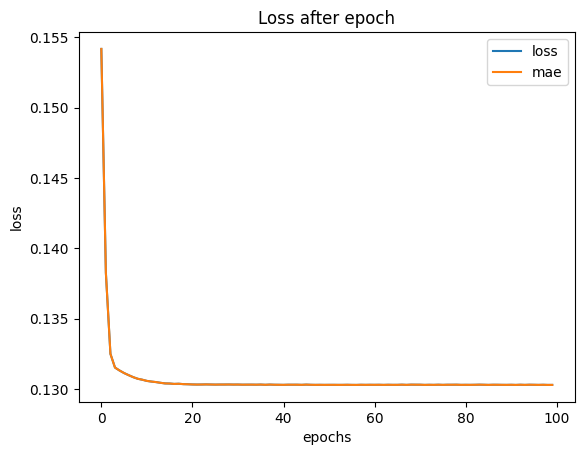

In [88]:
pd.DataFrame(history_7.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch")